# **This is the starting point of your final face recognition model.  You will need to fill in all of the missing boxes with correct code and sawer all of the conceptual questions.  You are also required to write correct and descriptive comments in each block.  For advanced, write correct and descriptive comments on each line of code.  Once you are approved (all code is working) you can move to Phase 2 of your project. Your model needs to reach a 80% accuracy on your testing data for your final project.**

In [2]:
from tensorflow import keras # imports al of the necessary libraries and functions from libraries that are needed to run this code
from tensorflow.keras import layers
from tensorflow.keras.datasets import imdb
import numpy as np
import os, shutil, pathlib
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.utils import array_to_img
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image

# Path to use to save models
OUTPUT_MODEL_BASE = "/content/gdrive/My Drive/AI-Institute_Drew Collaboration/2025model/"
OUTPUT_MODEL_NAME='anaysa_glover_2025'
# You need to know the version of tensorflow if you want to re-import the model on another computer
# to make sure you pull in the right version of tensorflow
# This notebook originally used 2.15.0 on April 22, 2024
# version 2.18.0 on May 15, 2025
print("Tensorflow Version: " + tf.__version__)

Tensorflow Version: 2.18.0


In [3]:
def show_image(im):
  plt.imshow(im,cmap=plt.cm.summer)
  plt.show()

In [4]:
def show_image_vpp(im,value,prediction,probability):
  plt.imshow(im,cmap=plt.cm.summer)
  plt.show()
  print("the value is ",student_names[value])
  print("The predicted value is ",student_names[prediction]," with probability: ",probability)

Keep this as is for now. Once you get everything running, you will come back to this and build out the layers using what you know.

In [5]:
def build_model(input_shape):
    input = keras.Input(shape=(input_shape,),name="data")
    l1 = layers.Dense(512,activation="relu")(input)
    #fill in here
    #fill in here
    #fill in here
    #fill in here
    output = layers.Dense(31,activation="softmax")(l1)
    model = keras.Model(inputs=input,outputs=output)
    return model

1) Explain what the 31 means in the output layer.  

Answer:  How many answers there could be

Note that the number of epochs below is 1.  Don't change it for now, but after you get everything else working, you will need to come back and address this to improve your model's accuracy.  

In [6]:
def train_model(model,train_tensors,train_labels):
    model.compile(optimizer="rmsprop",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
    model.fit(train_tensors,train_labels,epochs=1)

2) How do you know if you need more or less epochs?  

Answer:  You need more epochs is you want there to be a bbetter accuracy

In [7]:
def predict(model,test_tensors):
    mpredictions = model.predict(test_tensors)
    digit_predictions = np.array([x.argmax() for x in mpredictions])
    digit_probability = np.array([mpredictions[i][p] for i, p in enumerate(digit_predictions)])
    return digit_predictions,digit_probability

# Get the training and testing data.  Use this video if you are absent when I go over this in class.  

This is new code and it is not expected that you understand this, but you need to add a shortcut to this folder on your google drive.  Once you have your shortcut, replace the below path after "My Drive/" with your path. I will walk you through this step in class. Once you have done that, run this code to confirm you are accessing the class image files.  If you are not here when we do this part, you can watch this video of how to do it here: https://www.loom.com/share/4316be2eaac34ddfa1fcfed7d7bbbbcf?sid=725db59f-5ceb-43b4-bb14-5c37dd947108
  

Folder link: https://drive.google.com/drive/folders/1-8UNC2YyagZ6cr6nq2USM8ih6wGUOTh8?usp=sharing


In [8]:
from google.colab import drive
drive.mount('/content/gdrive')
#!ls "/content/gdrive/My Drive/ML_Image_Data/MLImages-backup-240416-140003"
!ls "/content/gdrive/My Drive/EngineeringConcepts2025"
plt.figure(figsize=(10,10))
size_picture = 100

Mounted at /content/gdrive
 Anaysa_Glover	   Eric_Ayers	    Krista_Fongeh       Regie_Ingram
 Ariana_Harris	   Ethan_Edwards    Landon_Calbert      Tameka_Allen
 Armon_Anderson    Grant_Packwood  "Marielle_O'Neill"   Thihini_Nagendran
 Avery_Roberson    Jack_Crippen    "Mayci_O'Neill"      Timothy_Whitaker
 Beth_White	   Jack_Lovell	    Michael_Rashad      Titus_Smith
 Cameron_Green	   Jai_Bazawule     Panselle_Range      Zamyaih_Williams
 Courtney_Bryant   Jordyn_Hanes     Penny_Dunn
 Dustin_Mills	   Kendrick_Myers   Peter_McKnight


<Figure size 1000x1000 with 0 Axes>

In [9]:
#(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

3) In the digit recognition model, what did this (above) block of code do?  Break down your answer into all four parts.

Answer:The above block of code connected to my google drive and imported all my classmates files of their pictures. It also shaped al of the pictures

Run the below functions.

In [10]:
def tensor_from_image(filename):
    img = load_img(filename,color_mode = 'grayscale')
    img = img.resize((size_picture,size_picture))
    return img_to_array(img).reshape((size_picture,size_picture))

In [11]:
def load_dataset():
    train_images = []
    train_labels = []
    test_images = []
    test_labels = []
    base_directory = pathlib.Path('/content/gdrive/My Drive/EngineeringConcepts2025')
    student_names = os.listdir(base_directory)
    k = 0
    n = 0
    names = []
    for i, s in enumerate(student_names):
        print(i,s)
        if s!=".DS_Store":
            names.append(s)
            student_directory = base_directory / s
            image_names = os.listdir(student_directory)
            for i in image_names:
                fname = student_directory / i
                t = tensor_from_image(fname) / 255
                if n % 9 == 0:
                    test_images.append(t)
                    test_labels.append(k)
                else:
                    train_images.append(t)
                    train_labels.append(k)
                n += 1
            k += 1
    return (k,
            (np.array(train_images),np.array(train_labels)),
            (np.array(test_images),np.array(test_labels)),
            names
           )

Run this code to load your data.  

In [12]:
(nb_students,(train_images,train_labels),(test_images,test_labels),student_names) = load_dataset()


0 Jack_Lovell
1 Ariana_Harris
2 Grant_Packwood
3 Marielle_O'Neill
4 Beth_White
5 Timothy_Whitaker
6 Jack_Crippen
7 Anaysa_Glover
8 Mayci_O'Neill
9 Landon_Calbert
10 Penny_Dunn
11 Eric_Ayers
12 Michael_Rashad
13 Jordyn_Hanes
14 Regie_Ingram
15 Panselle_Range
16 Krista_Fongeh
17 Thihini_Nagendran
18 Titus_Smith
19 Cameron_Green
20 Jai_Bazawule
21 Ethan_Edwards
22 Armon_Anderson
23 Zamyaih_Williams
24 Avery_Roberson
25 Courtney_Bryant
26 Peter_McKnight
27 Kendrick_Myers
28 Dustin_Mills
29 Tameka_Allen


Print out each of the six items in the loaded data to get an idea of or refresh yourself on what they are.

4) Print nb_students.  

In [13]:
print(nb_students)

30


4a) What does this number represent?

The nuber 31 that was produced from the code block above is the number of names that were in the file that was imported from my drive.

5) Print train_images.  

In [14]:
print(train_images)

[[[0.63529414 0.6745098  0.70980394 ... 0.5294118  0.53333336 0.53333336]
  [0.6784314  0.7176471  0.7529412  ... 0.53333336 0.53333336 0.5372549 ]
  [0.73333335 0.76862746 0.8        ... 0.5372549  0.5411765  0.54509807]
  ...
  [0.03921569 0.03529412 0.03921569 ... 0.4117647  0.3647059  0.23921569]
  [0.03529412 0.03529412 0.03529412 ... 0.41568628 0.36862746 0.26666668]
  [0.03529412 0.03921569 0.03529412 ... 0.41960785 0.38039216 0.29803923]]

 [[0.7529412  0.79607844 0.8352941  ... 0.6156863  0.6156863  0.61960787]
  [0.79607844 0.8352941  0.8666667  ... 0.6156863  0.61960787 0.61960787]
  [0.8392157  0.8745098  0.9019608  ... 0.6156863  0.61960787 0.61960787]
  ...
  [0.04705882 0.04313726 0.04313726 ... 0.4392157  0.42745098 0.36078432]
  [0.05490196 0.04313726 0.04313726 ... 0.43137255 0.42745098 0.36862746]
  [0.04705882 0.04313726 0.04705882 ... 0.43137255 0.42352942 0.3882353 ]]

 [[0.5411765  0.57254905 0.6117647  ... 0.36862746 0.36862746 0.36862746]
  [0.5764706  0.603921

5a) What is train_images?  

Answer:Train image is showing the color scale for the pictures

6) Print train_labels.

In [15]:
print(train_labels)

[ 0  0  0 ... 29 29 29]


6a) What do these numerical values represent?  

Answer:The numerical value is showing the numbers that were used to lable each name

7) Print test_images.  

In [16]:
print(test_images)

[[[0.627451   0.6666667  0.7058824  ... 0.5137255  0.5176471  0.5254902 ]
  [0.6666667  0.69803923 0.7294118  ... 0.5176471  0.52156866 0.5254902 ]
  [0.70980394 0.7411765  0.76862746 ... 0.52156866 0.5254902  0.5294118 ]
  ...
  [0.21176471 0.15686275 0.09803922 ... 0.37254903 0.30588236 0.24313726]
  [0.4627451  0.13725491 0.09019608 ... 0.3764706  0.29803923 0.25882354]
  [0.5058824  0.1254902  0.13725491 ... 0.37254903 0.30980393 0.2901961 ]]

 [[0.627451   0.6666667  0.7058824  ... 0.5176471  0.5176471  0.52156866]
  [0.6666667  0.69803923 0.7294118  ... 0.5176471  0.52156866 0.5254902 ]
  [0.70980394 0.7411765  0.76862746 ... 0.52156866 0.5254902  0.5294118 ]
  ...
  [0.21176471 0.15686275 0.09803922 ... 0.52156866 0.4509804  0.39607844]
  [0.4627451  0.13333334 0.09019608 ... 0.3529412  0.30980393 0.29803923]
  [0.5019608  0.1254902  0.13333334 ... 0.3529412  0.38039216 0.35686275]]

 [[0.7019608  0.74509805 0.78431374 ... 0.6039216  0.60784316 0.60784316]
  [0.7490196  0.788235

8) Print test_labels.

In [17]:
print(test_labels)

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  1  1  1  1  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  3  3
  3  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4
  4  4  4  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6
  6  6  6  6  6  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  8  9
  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9
  9  9  9  9 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 11 11 11
 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 12 12 12 12 12 12 12 12 12
 12 12 13 13 13 13 13 13 13 13 13 13 13 13 13 14 14 14 14 14 14 14 14 14
 14 14 14 14 14 14 14 14 14 14 14 14 14 14 15 15 15

9) Print student_names.

In [18]:
print(student_names)

['Jack_Lovell', 'Ariana_Harris', 'Grant_Packwood', "Marielle_O'Neill", 'Beth_White', 'Timothy_Whitaker', 'Jack_Crippen', 'Anaysa_Glover', "Mayci_O'Neill", 'Landon_Calbert', 'Penny_Dunn', 'Eric_Ayers', 'Michael_Rashad', 'Jordyn_Hanes', 'Regie_Ingram', 'Panselle_Range', 'Krista_Fongeh', 'Thihini_Nagendran', 'Titus_Smith', 'Cameron_Green', 'Jai_Bazawule', 'Ethan_Edwards', 'Armon_Anderson', 'Zamyaih_Williams', 'Avery_Roberson', 'Courtney_Bryant', 'Peter_McKnight', 'Kendrick_Myers', 'Dustin_Mills', 'Tameka_Allen']


10) Assign the shape of train_images to train_shape. Print train_shape.

In [19]:
train_shape = train_images.shape
print(train_shape)

(4053, 100, 100)


11) Print out the first image train_images in matrix format.



In [20]:
print(train_images[0])

[[0.63529414 0.6745098  0.70980394 ... 0.5294118  0.53333336 0.53333336]
 [0.6784314  0.7176471  0.7529412  ... 0.53333336 0.53333336 0.5372549 ]
 [0.73333335 0.76862746 0.8        ... 0.5372549  0.5411765  0.54509807]
 ...
 [0.03921569 0.03529412 0.03921569 ... 0.4117647  0.3647059  0.23921569]
 [0.03529412 0.03529412 0.03529412 ... 0.41568628 0.36862746 0.26666668]
 [0.03529412 0.03921569 0.03529412 ... 0.41960785 0.38039216 0.29803923]]


12) Print out the first image in train images in image format.

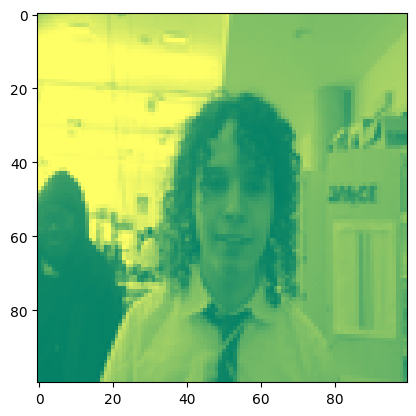

In [21]:
show_image(train_images[0])


13) Print out the label for this image.

In [22]:
print(train_labels[0])

0


Print out the name associated with this label.

In [23]:
student_names[0]


'Jack_Lovell'

14) Print out the second name in student_names.

In [24]:
print(student_names[1])

Ariana_Harris


15) Write a for loop to print out all of the names in the list student_names and their indices (indexes).  

In [25]:
for i in range(30):
  print(student_names[i] + " " + str(i))

Jack_Lovell 0
Ariana_Harris 1
Grant_Packwood 2
Marielle_O'Neill 3
Beth_White 4
Timothy_Whitaker 5
Jack_Crippen 6
Anaysa_Glover 7
Mayci_O'Neill 8
Landon_Calbert 9
Penny_Dunn 10
Eric_Ayers 11
Michael_Rashad 12
Jordyn_Hanes 13
Regie_Ingram 14
Panselle_Range 15
Krista_Fongeh 16
Thihini_Nagendran 17
Titus_Smith 18
Cameron_Green 19
Jai_Bazawule 20
Ethan_Edwards 21
Armon_Anderson 22
Zamyaih_Williams 23
Avery_Roberson 24
Courtney_Bryant 25
Peter_McKnight 26
Kendrick_Myers 27
Dustin_Mills 28
Tameka_Allen 29


16) Reshape your train_images "from a box into a line" and assign them to train_tensors.  Print out train_tensors.shape to confirm that they have been put into a line.  

In [26]:
train_tensors = train_images.reshape(train_images.shape[0], -1)
train_tensors.shape

(4053, 10000)

17) Call the build model function with the correct parameter (the second value in train_tensors.shape). Make sure you name the output "model."

In [30]:
model = build_model(train_tensors.shape[1])

18) Print out the model summary using the summary method.

In [31]:
model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ data (InputLayer)               │ (None, 10000)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     5,120,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 31)             │        15,903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,136,415 (19.59 MB)

 Trainable params: 5,136,415 (19.59 MB)

 Non-trainable params: 0 (0.00 B)

19) Call the train model function with the appropraite parameters. Remember all functions are defined above if you need a reference.

In [32]:
train_model(model, train_tensors, train_labels)


127/127 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.1853 - loss: 11.4185


In [33]:
import json
with open(os.path.join(OUTPUT_MODEL_BASE, "%s_labels.json") % (OUTPUT_MODEL_NAME), 'w') as f:
  f.write(json.dumps(student_names))


# Convert model to TFLite format and save
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()


with open(os.path.join(OUTPUT_MODEL_BASE, '%s.tflite' % (OUTPUT_MODEL_NAME)), 'wb') as f:
  f.write(tflite_model)

Saved artifact at '/tmp/tmpa6s5uoz8'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 10000), dtype=tf.float32, name='data')
Output Type:
  TensorSpec(shape=(None, 31), dtype=tf.float32, name=None)
Captures:
  140559325866000: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140559325864464: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140559325866768: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140559325865808: TensorSpec(shape=(), dtype=tf.resource, name=None)


20) What is an epoch?

Answer:The data and time relative to the timestamp of a computer

21) The model is trained; it is time to see how well it does at recognizing your faces!!  To do this you need to reshape the testing dataset and assign it to test_shape.


In [1]:
test_shape = test_images.shape
print(test_shape)

NameError: name 'test_images' is not defined

22) Reshape your test_images "from a box to a line" and assign them to test_tensors.

In [ ]:
test_tensors = test_shape


23) Print your 20th test image in matrix format.

In [ ]:
print(test_images[20])

24) Print your 20th test image in image format.

In [ ]:
print(test_images[20])

25) Print the label that represents this image (numerical value).  

In [ ]:
print(test_labels[20])

26) Print the corresponding students' name that is represented by this image.

In [ ]:
print(student_names[test_labels[20]])

Now we can make predictions and get probabilities.  I will be checking this block to make sure that everything above it has run. Do not edit this block of code at all.

In [ ]:
pred, prob = predict(model,test_tensors)

In [ ]:
pred

27) Describe what these numerical values mean.

Answer:The indexes of the people that the modle is predicting

In [ ]:
prob

28) Describe what these numerical values mean.

Answer:  How accurate the modle is

29) Print the 30th image in the test image dataset, its label and prediction and probability.

In [ ]:
show_image(test_images[29])
print(prob[29])
print(pred[29])

30) Plot the 3rd image in the test_images dataset, its label, prediction, and probability.  

In [ ]:
show_image(test_images[29])
print(student_names[1])
print(pred[29],  prob[29])

Compute the number of wrong predictions. If everything above is running correctly this code block should run. Do not change it.  

In [ ]:
wrong_predictions_count = 0
for i in range(test_images.shape[0]):
    if test_labels[i] != pred[i]:
      wrong_predictions_count= wrong_predictions_count + 1
wrong_predictions_count

31) Explain which two items are being compared in your own words to get the "wrong_predictions."

Answer:The test and prediction lables

Determine the number of wrong predictions in the test dataset.  If everything above is running correctly this code block should run. Do not change it.

In [ ]:
wrong_predictions_count = 0
for i in range(test_images.shape[0]):
    if test_labels[i] != pred[i]:
      wrong_predictions_count= wrong_predictions_count + 1
wrong_predictions_count

Calculate the accuracy on the test_images.  If everything above is running correctly this code block should run. Do not change it.

In [ ]:
accuracy = 1-(wrong_predictions_count/len(test_labels))
accuracy

32) Determine the number of wrong predictions in the training dataset.  


In [ ]:
wrong_predictions_count = 0
for i in range(test_images.shape[0]):
    if train_labels[i] != pred[i]:
      wrong_predictions_count= wrong_predictions_count + 1
wrong_predictions_count

33) Calculate the accuracy on the training_images.  

In [ ]:
accuracy = 1-(wrong_predictions_count/len(train_images))
accuracy

34) Describe why the accuracy of the training images is higher than that of the testing images.  

Answer:The number of trainging images is is greater then the number of testing images


35) Display the first 10 faces in the training dataset, their predictions and probabilities.


In [ ]:
for i in range(9):
  show_image(train_images[i])
  print(pred[i])
  print(prob[i])
  print('-'*20)


Evaluate the accuracy of the test set using model.evaluate.  Do not change this code.


In [ ]:
model.evaluate(train_tensors, train_labels)

Evaluate the accuracy of the test set using model.evaluate.  Do not change this code.

In [ ]:
model.evaluate(test_tensors, test_labels )

Once you get this entire model working (don't worry about the accuracy yet), call me over to grade it.  Once you get it working it will be time to manipulate the building model function and training model function for accuracy.  